Import Libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel(r'C:\Users\91904\Desktop\Projects\Online Retail.xlsx', encoding='cp1252')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Checking for null values.

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We have null values present in two columns (Description and CustomerID). For description field we can ignore the null values because we will not be using that column for our analysis. For the null values present in customerID, we can treat them as guest customer who have purchased only once and not registered. So, we will drop those customers.

In [8]:
data['CustomerID'].notnull

<bound method Series.notnull of 0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64>

In [9]:
data = data[pd.notna(data['CustomerID'])]

In [10]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
data.shape

(406829, 8)

From data description we have seen columns UnitPrice and Quantity contains negative values. Lets remove them also.

In [12]:
data[(data['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Removing the negative quantity values from our dataset.

In [13]:
data = data[(data['Quantity'] > 0)]

In [14]:
data.shape

(397924, 8)

In [15]:
data[(data['Quantity']) < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Similarly, let us also check for Unit price.

In [16]:
data[(data['UnitPrice']) < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


No such values present.

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


We can see in InvoiceDate column we have both date and time. For our CLV analysis we only need the date value.
So, we will remove the time from the date.

In [18]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.date

In [19]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


For CLV analysis we need total sales data. So, we will create a new field called sales.

In [20]:
data['Total_sales'] = data['Quantity'] * data['UnitPrice']

In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


For CLV analysis we only need InvoiceDate, Total_sales and CustomerID.

In [22]:
column = ['CustomerID', 'InvoiceDate', 'Total_sales']

In [23]:
data_clv = data[column]

In [24]:
data_clv.head()

,CustomerID,InvoiceDate,Total_sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34


Checking for number of customers customers

In [25]:
data_clv['CustomerID'].nunique()

4339

In [26]:
data_clv['InvoiceDate'].max()

datetime.date(2011, 12, 9)

Calculating the recency, frequency, age and monetary values using the built in function of lifetimes package.

In [27]:
import lifetimes
from lifetimes import utils

In [28]:
data_clv = utils.summary_data_from_transaction_data(data_clv, 'CustomerID','InvoiceDate', monetary_value_col='Total_sales',
                                                   observation_period_end='2011-12-09')

In [29]:
data_clv.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


(array([2.924e+03, 8.000e+02, 2.180e+02, 1.570e+02, 8.300e+01, 3.600e+01,
        4.000e+01, 2.400e+01, 1.000e+01, 1.300e+01, 7.000e+00, 4.000e+00,
        5.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.  ,   2.62,   5.24,   7.86,  10.48,  13.1 ,  15.72,  18.34,
         20.96,  23.58,  26.2 ,  28.82,  31.44,  34.06,  36.68,  39.3 ,
         41.92,  44.54,  47.16,  49.78,  52.4 ,  55.02,  57.64,  60.26,
         62.88,  65.5 ,  68.12,  70.74,  73.36,  75.98,  78.6 ,  81.22,
         83.84,  86.46,  89.08,  91.7 ,  94.32,  96.94,  99.56, 102.18,
        104.8 , 

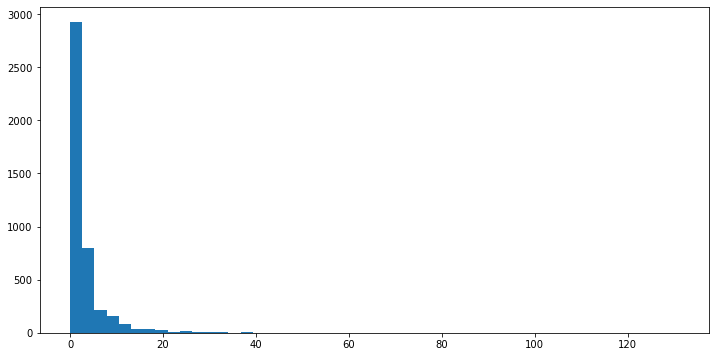

In [31]:
plt.figure(figsize=(12,6))
plt.hist(data_clv['frequency'], bins=50)

From this histogram we can see most people have bought something one time only.

In [32]:
data_clv['frequency'].describe()

count    4339.000000
mean        2.864024
std         5.952745
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64

Implementing Buy till you die model BG/NBD for CLV analysis.

In [51]:
from lifetimes import BetaGeoFitter

In [52]:
bgf = BetaGeoFitter(penalizer_coef=0)

In [53]:
bgf.fit(data_clv['frequency'], data_clv['recency'], data_clv['T'])

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 68.89, b: 6.75, r: 0.83>

In [55]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.826433,0.026780,0.773944,0.878922
alpha,68.890678,2.611055,63.773011,74.008345
a,0.003443,0.010347,-0.016837,0.023722
b,6.749363,22.412933,-37.179985,50.678711


Plotting frequecy and recency matrix.

In [56]:
from lifetimes.plotting import plot_frequency_recency_matrix

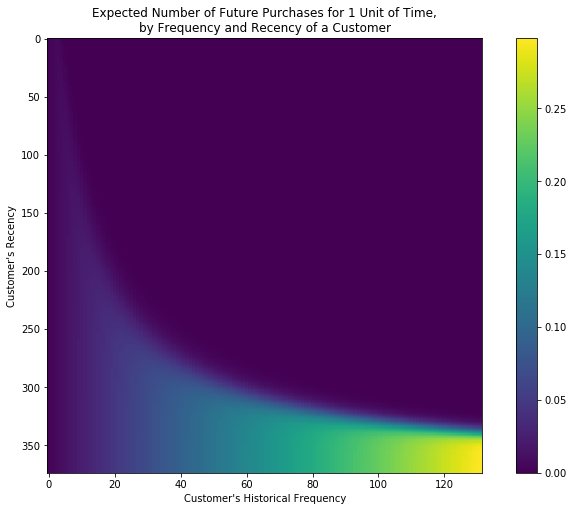

In [57]:
plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

Pridicting if customer is surely alive.

In [58]:
from lifetimes.plotting import plot_probability_alive_matrix

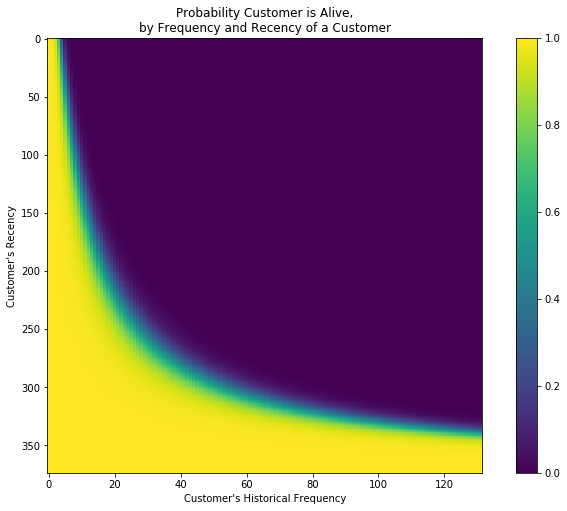

In [59]:
plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

Predicting future transactions by the customers in next 50 days. We will also find the top 10 customers which the model expects to make purchase in next 50 days.

In [61]:
t=50
data_clv['Predicted_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t,data_clv['frequency'],
                                                                                         data_clv['recency'],
                                                                                         data_clv['T']),2)

In [62]:
data_clv.sort_values(by='Predicted_txn', ascending=False).head(50)

,frequency,recency,T,monetary_value,Predicted_txn
CustomerID,,,,,
14911.0,131.0,372.0,373.0,1093.661679,14.91
12748.0,113.0,373.0,373.0,298.360885,12.88
17841.0,111.0,372.0,373.0,364.452162,12.65
15311.0,89.0,373.0,373.0,677.729438,10.16
14606.0,88.0,372.0,373.0,135.890114,10.05
12971.0,70.0,369.0,372.0,159.211286,8.03
13089.0,65.0,367.0,369.0,893.714308,7.51
14527.0,53.0,367.0,369.0,155.016415,6.14
13798.0,52.0,371.0,372.0,706.650962,5.99


Evaluating the BG/NBD model.

In [63]:
from lifetimes.plotting import plot_period_transactions

<Figure size 1152x576 with 0 Axes>

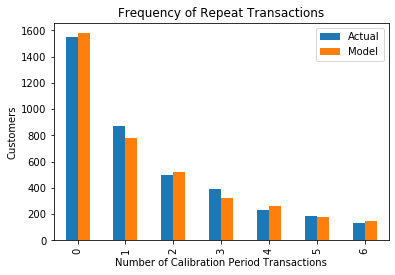

In [65]:
plot_period_transactions(bgf)

Now, we will use the gamma gamma model to predict the transactional values by the customer in future.

In [69]:
shortlist_customer = data_clv[data_clv['frequency'] > 0]

In [70]:
shortlist_customer.head()

,frequency,recency,T,monetary_value,Predicted_txn
CustomerID,,,,,
12347.0,6.0,365.0,367.0,599.701667,0.78
12348.0,3.0,283.0,358.0,301.480000,0.45
12352.0,6.0,260.0,296.0,368.256667,0.93
12356.0,2.0,303.0,325.0,269.905000,0.36
12358.0,1.0,149.0,150.0,683.200000,0.42


In [66]:
from lifetimes import GammaGammaFitter

In [67]:
ggf = GammaGammaFitter(penalizer_coef=0)

In [71]:
ggf.fit(shortlist_customer['frequency'],shortlist_customer['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>

In [73]:
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,2.103523,0.111998,1.884007,2.323039
q,3.449907,0.139042,3.177385,3.722429
v,485.570938,42.595555,402.083650,569.058225


In [74]:
ggf.conditional_expected_average_profit(data_clv['frequency'],data_clv['monetary_value']).head(10)

CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
12352.0    376.166864
12353.0    416.917667
12354.0    416.917667
12355.0    416.917667
12356.0    324.008941
dtype: float64

In [75]:
data_clv['predicted_trans'] = round(ggf.conditional_expected_average_profit(data_clv['frequency'],
                                                                            data_clv['monetary_value']),1)

In [76]:
data_clv.head()

,frequency,recency,T,monetary_value,Predicted_txn,predicted_trans
CustomerID,,,,,,
12346.0,0.0,0.0,325.0,0.000000,0.10,416.9
12347.0,6.0,365.0,367.0,599.701667,0.78,570.0
12348.0,3.0,283.0,358.0,301.480000,0.45,333.8
12349.0,0.0,0.0,18.0,0.000000,0.48,416.9
12350.0,0.0,0.0,310.0,0.000000,0.11,416.9


Predicting customer lifetime value for next 12 months.

In [78]:
data_clv['CLV'] = round(ggf.customer_lifetime_value(bgf,data_clv['frequency'],data_clv['recency'],data_clv['monetary_value'],
                                                   data_clv['T'],time=12, discount_rate=0.03),1)

In [79]:
data_clv.head()

,frequency,recency,T,monetary_value,Predicted_txn,predicted_trans,CLV
CustomerID,,,,,,,
12346.0,0.0,0.0,325.0,0.000000,0.10,416.9,1491.2
12347.0,6.0,365.0,367.0,599.701667,0.78,570.0,1136.8
12348.0,3.0,283.0,358.0,301.480000,0.45,333.8,1154.0
12349.0,0.0,0.0,18.0,0.000000,0.48,416.9,1491.2
12350.0,0.0,0.0,310.0,0.000000,0.11,416.9,1491.2


In [80]:
data_clv.sort_values(by='CLV', ascending=False).head(10)

,frequency,recency,T,monetary_value,Predicted_txn,predicted_trans,CLV
CustomerID,,,,,,,
14606.0,88.0,372.0,373.0,135.890114,10.05,139.6,48299.1
17961.0,34.0,351.0,372.0,34.379118,3.95,47.0,37506.3
12748.0,113.0,373.0,373.0,298.360885,12.88,299.6,34522.9
12971.0,70.0,369.0,372.0,159.211286,8.03,163.4,34502.1
17841.0,111.0,372.0,373.0,364.452162,12.65,365.0,28748.5
14527.0,53.0,367.0,369.0,155.016415,6.14,160.6,26518.2
13468.0,35.0,372.0,373.0,152.712000,4.05,161.2,18045.8
17315.0,34.0,356.0,357.0,181.862941,4.09,189.6,14866.2
17811.0,37.0,329.0,333.0,206.804324,4.70,213.2,13729.1
